In [1]:
import importlib
starsex = importlib.import_module("02_SExtractor")
psfex = importlib.import_module("03_PSFEx")

In [2]:
field = 'GDS/gds-grizli-v7.0'
# field = 'COSMOS/primer-cosmos-grizli-v7.0'
# field = 'CEERS/ceers-full-grizli-v7.2'

> 
----- Source Extractor 2.25.0 started on 2024-04-19 at 17:37:35 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for gds-grizli-v7.0-f200w-clear_drc_sci.fits
----- Measuring from: gds-grizli-v7.0-f200w-clear_drc_sci.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
> Looking for gds-grizli-v7.0-f200w-clear_drc_wht.fits
----- Weighting from: gds-grizli-v7.0-f200w-clear_drc_wht.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  256
> Setting up background map at line:  512
> Setting up background map at line:  768
> Setting up background map at line: 1024
> Setting up background map at line: 1280
> Setting up background map at line: 1536
> Setting up background map at line: 1792
> Setting up background ma

DBSCAN clustering : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 697, 7338,    7,    9,   11,   10,    7,    6,   22,   41,    9,
          6,    8,    5,    5,    6,    6,    9,   15,    5,   11,    6,
          6,    8,    5,    5,    5,    5,    5]))


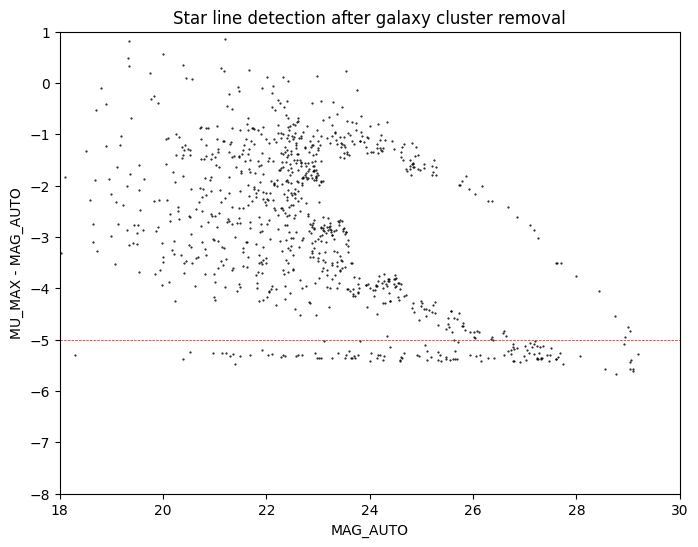

RANSAC Slope : -0.008
Star line    : -5.352


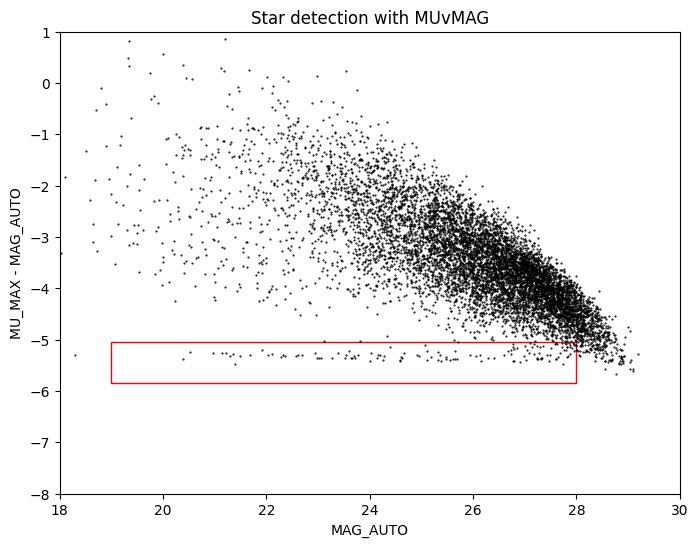

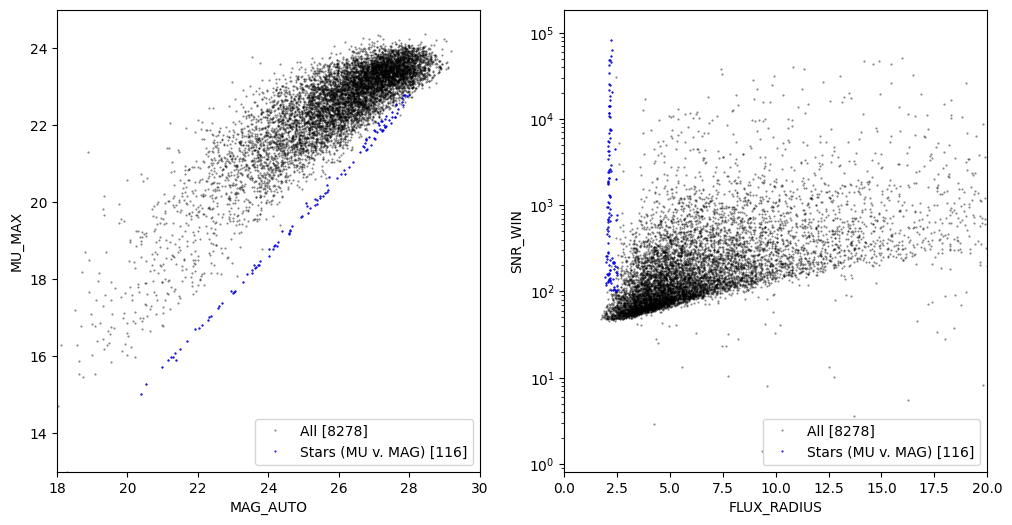

In [17]:
# F200W Point-like sources detection
filter = 'f200w'
starsex.extract_stars(detect_img      = f"/home/aurelien/DAWN/DJA_SE++/image/{field}-{filter}-clear_drc_sci.fits", \
                      weight_img      = f"/home/aurelien/DAWN/DJA_SE++/image/{field}-{filter}-clear_drc_wht.fits", \
                      output_cat      = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}-{filter}-clear_drc_cat.fits", \
                      output_cat_star = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}_drc_cat_star.fits", \
                      config_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST.sex", \
                      params_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST-SW.param", \
                      dir_chckimg     = f"/home/aurelien/DAWN/DJA_SE++/checkimages/{'/'.join(field.split('/')[:-1])}", \
                      detect_thresh = 8.0, \
                      y_max = -5.0, \
                      save_chckimg = True, plot = True, verbose = True)

In [3]:
# PSF in other images
# filter_list = ['f090w', 'f115w', 'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f444w']
filter_list = ['f090w', 'f115w', 'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f444w']

In [16]:
for filter in filter_list:
    print(filter.upper())
    starsex.extract_stars_catalog(detect_img      = f"/home/aurelien/DAWN/DJA_SE++/image/{field}-{filter}-clear_drc_sci.fits", \
                                  weight_img      = f"/home/aurelien/DAWN/DJA_SE++/image/{field}-{filter}-clear_drc_wht.fits", \
                                  output_cat      = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}-{filter}-clear_drc_cat.fits", \
                                  output_cat_star = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}-{filter}-clear_drc_cat_star.fits", \
                                  input_cat_star  = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}_drc_cat_star.fits", \
                                  config_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST.sex", \
                                  params_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST-SW.param", \
                                  dir_chckimg     = f"/home/aurelien/DAWN/DJA_SE++/checkimages/{'/'.join(field.split('/')[:-1])}", \
                                  detect_thresh = 2.5, \
                                  save_chckimg = True, plot = True, verbose = False)
    psfex.run_psfex(cat_name    = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}-{filter}-clear_drc_cat_star.fits",
                    output_cat  = f"/home/aurelien/DAWN/DJA_SE++/catalog/{field}-{filter}-clear_drc_star_psf_cat.fits",
                    dir_chckimg = f"/home/aurelien/DAWN/DJA_SE++/checkimages/{'/'.join(field.split('/')[:-1])}",
                    dir_psfex   = f"/home/aurelien/DAWN/DJA_SE++/psfex/{'/'.join(field.split('/')[:-1])}",
                    config_file = "/home/aurelien/DAWN/DJA_SE++/config/psfex_default.conf",
                    fwhm_range  = '1.0, 10.0',
                    save_psf_png = True,
                    verbose = False)

F182M


## Visualize all PSFs

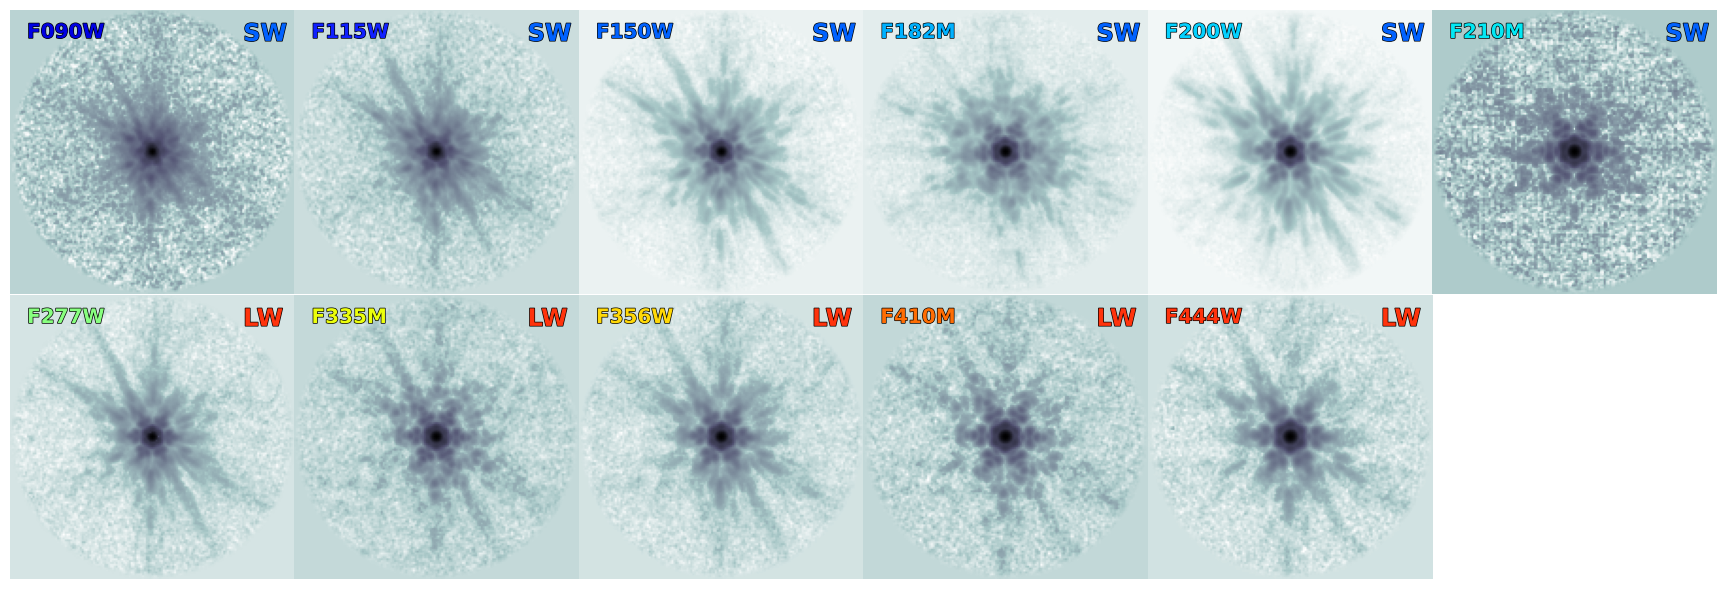

In [7]:
color_dict = {'F090W':'#0000E3', 
              'F115W':'#1020FF',
              'F150W':'#0162FF',
              'F182M':'#00B1FF',
              'F200W':'#04D1FF',
              'F210M':'#02E8F4',
              'F277W':'#87FF7F',
              'F335M':'#EBFF0C',
              'F356W':'#FFD807',
              'F410M':'#FF6D03',
              'F444W':'#FF330C',}
channel_dict = {'F090W':'SW', 'F115W':'SW', 'F150W':'SW', 'F182M':'SW', 'F200W':'SW', 'F210M':'SW',
                'F277W':'LW', 'F335M':'LW', 'F356W':'LW', 'F410M':'LW', 'F444W':'LW',}
channel_color_dict = {'SW' : '#0162FF', 'LW' : '#FF330C'}

channel, count = np.unique([channel_dict[filter.upper()] for filter in filter_list], return_counts=True)
channel_count = dict(zip(channel, count))

w = channel_count[max(channel_count, key=channel_count.get)]
h = len(channel_count)

fig, axs = plt.subplots(h,w,figsize=(2.9*w,3*h), sharex=True, sharey=True, gridspec_kw = {'wspace':0, 'hspace':0})
for i, filter in enumerate(filter_list):
    image = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/psfex/{field}*{filter}*star_psf.psf")[0])
    psf = image[1].data[0][0][0]
    image.close()
    
    if (len(channel_count)==2) & (channel_dict[filter.upper()]=="LW"):
        i += max(0, channel_count["LW"]-channel_count["SW"])
    ax = axs.flatten()[i] if type(axs)==np.ndarray else axs
    ax.set_axis_off()
    ax.imshow(psf, origin='lower', cmap='bone_r', norm=SymLogNorm(linthresh=1e-5, linscale=0.8))
    ax.text(0.06, 0.9, filter.upper(), transform=ax.transAxes, 
            fontsize='x-large', fontweight='bold', 
            color=color_dict[filter.upper()],
            path_effects=[patheffects.withStroke(linewidth=1, foreground="k")])
    ax.text(0.82, 0.89, channel_dict[filter.upper()], transform=ax.transAxes, 
            fontsize='xx-large', fontweight='bold', 
            color=channel_color_dict[channel_dict[filter.upper()]],
            path_effects=[patheffects.withStroke(linewidth=1, foreground="k")])

if type(axs)==np.ndarray:
    for j in range(len(filter_list), len(axs.flatten())):
        offset = -w if max(channel_count, key=channel_count.get)=="LW" else 0
        fig.delaxes(axs.flatten()[j+offset])
    
fig.tight_layout()
fig.savefig(f"/home/aurelien/DAWN/DJA_SE++/validation-images/5_PSF/PSF_summary_{field}.png", bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()

### Save all PSFs to make GIF

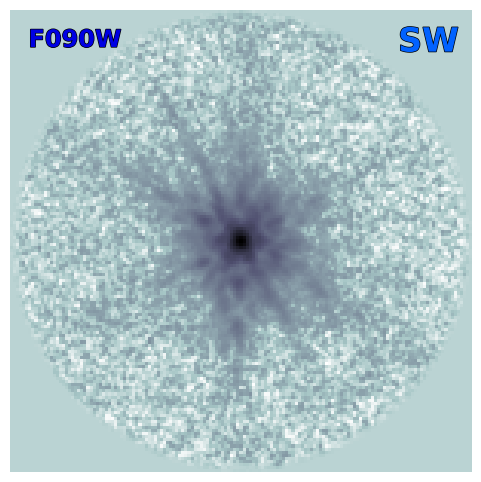

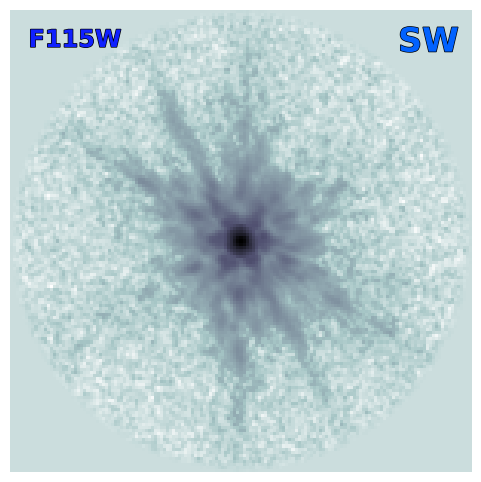

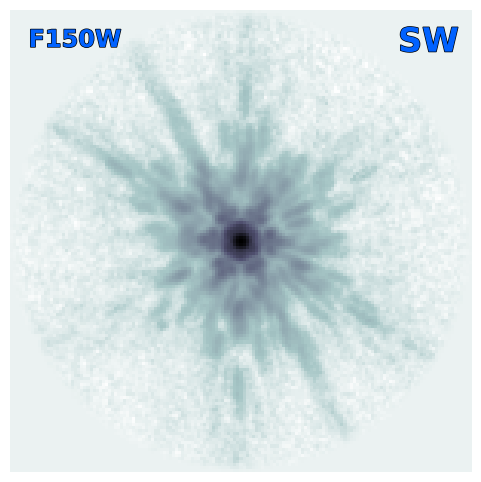

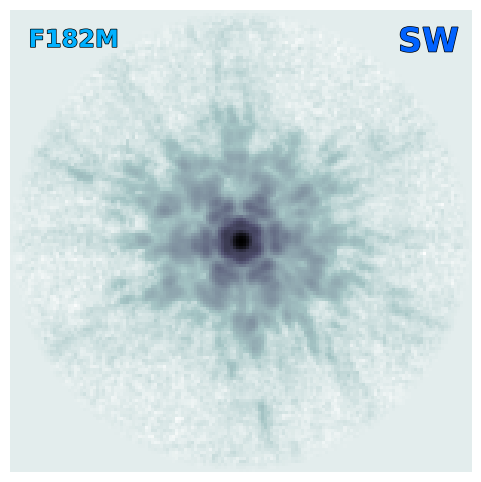

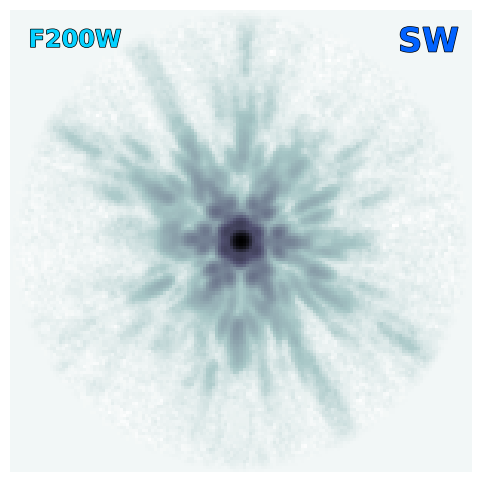

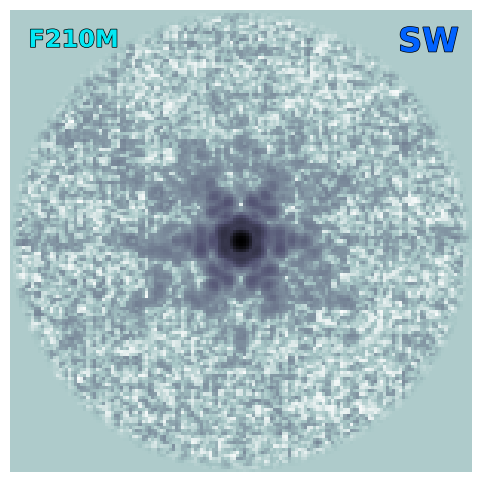

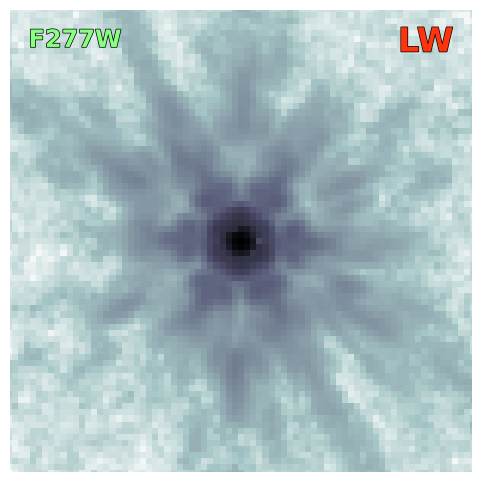

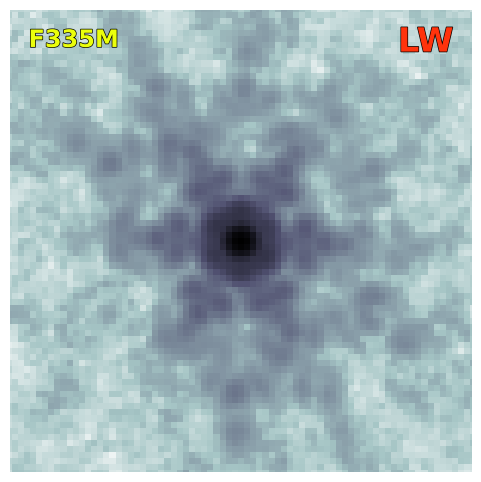

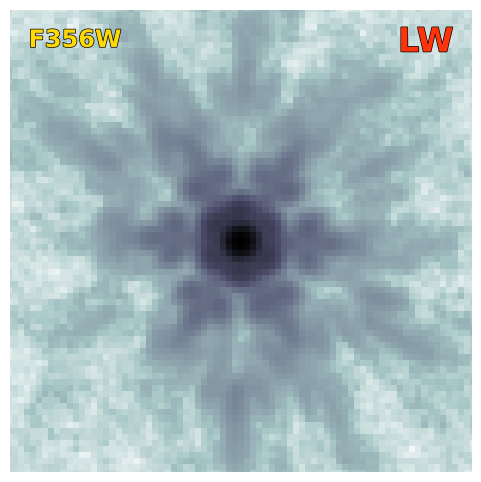

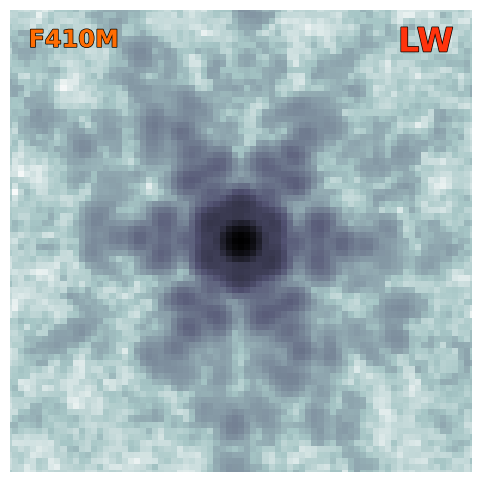

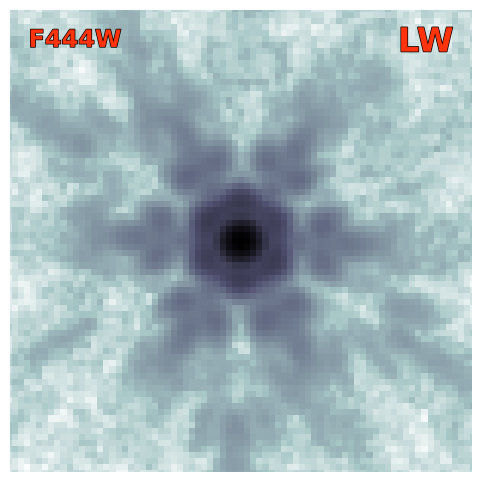

In [9]:
for filter in filter_list:
    image = fits.open(f"/home/aurelien/DAWN/DJA_SE++/psfex/{field}-{filter}-clear_drc_cat_star_psf.psf")
    psf = image[1].data[0][0][0]
    image.close()

    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_axis_off()
#     extent = (-100,100,-100,100) # No scaling
    extent = (-100,100,-100,100) if channel_dict[filter.upper()]=='SW' else (-200,200,-200,200) # Same pixel scale
    ax.imshow(psf, origin='lower', cmap='bone_r', norm=SymLogNorm(linthresh=1e-5, linscale=0.8), extent=extent)
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.text(0.04, 0.92, filter.upper(), transform=ax.transAxes, 
            fontsize='xx-large', fontweight='bold', 
            color=color_dict[filter.upper()],
            path_effects=[patheffects.withStroke(linewidth=1, foreground="k")])
    ax.text(0.84, 0.91, channel_dict[filter.upper()], transform=ax.transAxes, 
            fontsize=24, fontweight='bold', 
            color=channel_color_dict[channel_dict[filter.upper()]],
            path_effects=[patheffects.withStroke(linewidth=1, foreground="k")])
#     fig.savefig(f"/home/aurelien/DAWN/DJA_SE++/validation-images/5_PSF/{filter}.png", bbox_inches='tight', pad_inches=0, dpi=100) # No scaling
    fig.savefig(f"/home/aurelien/DAWN/DJA_SE++/validation-images/5_PSF/scaled_{filter}.png", bbox_inches='tight', pad_inches=0, dpi=100) # Same pixel scale

    plt.show()